In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('house-prices.csv')


X = np.array(data[['SqFt', 'Bedrooms', 'Bathrooms', 'Brick']])
y = np.array(data['Price']).reshape(-1,1)#.astype('float16')

X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.zeros(X_b.shape[1]).reshape(-1,1)  

print("Initial theta:", theta)


Initial theta: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [22]:
np.c_[np.ones((X.shape[0], 1)), X]

array([[1.00e+00, 1.79e+03, 2.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 2.03e+03, 4.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.74e+03, 3.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.98e+03, 3.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 2.13e+03, 3.00e+00, 3.00e+00, 0.00e+00],
       [1.00e+00, 1.78e+03, 3.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.83e+03, 3.00e+00, 3.00e+00, 1.00e+00],
       [1.00e+00, 2.16e+03, 4.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 2.11e+03, 4.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.73e+03, 3.00e+00, 3.00e+00, 0.00e+00],
       [1.00e+00, 2.03e+03, 3.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 1.87e+03, 2.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 1.91e+03, 3.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 2.15e+03, 3.00e+00, 3.00e+00, 1.00e+00],
       [1.00e+00, 2.59e+03, 4.00e+00, 3.00e+00, 0.00e+00],
       [1.00e+00, 1.78e+03, 4.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 2.19e+03, 3.00e+00, 3.00e+00, 1.00e+00

In [23]:
learning_rate = 0.00001
iterations = 500

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [24]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    theta = np.array(theta, dtype=np.float64)
    for i in range(iterations):
        predictions = X.dot(theta)
        error =predictions-y
        gradients = (1 / m) * X.T.dot(error)
        
        gradients = np.array(gradients, dtype=np.float64)
        theta -= learning_rate * gradients
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}, Theta: {theta}")

    return theta, cost_history

theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

final_cost = compute_cost(X_b, y, theta)
print(f"Final Cost after Gradient Descent: {final_cost}")



Iteration 0, Cost: 13428807018737.082, Theta: [[1.30427344e+00]
 [2.64095938e+03]
 [4.04517188e+00]
 [3.26112500e+00]
 [4.84867188e-01]]
Iteration 100, Cost: inf, Theta: [[5.55359146e+159]
 [1.12356580e+163]
 [1.69955703e+160]
 [1.37369651e+160]
 [1.84418636e+159]]
Iteration 200, Cost: nan, Theta: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iteration 300, Cost: nan, Theta: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iteration 400, Cost: nan, Theta: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


/home/fraz/Documents/ML/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_23977/993204806.py:7: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
/tmp/ipykernel_23977/32804811.py:11: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


Final Cost after Gradient Descent: nan


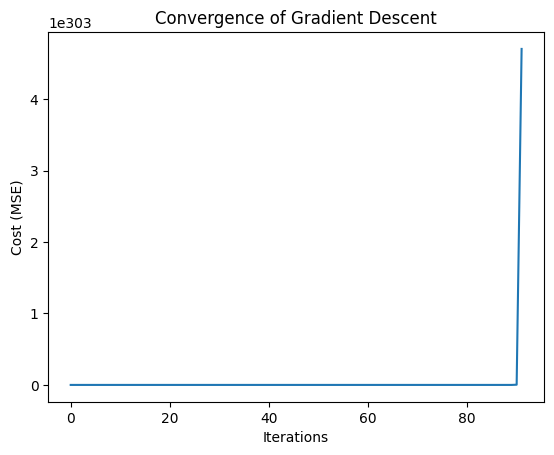

In [25]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Convergence of Gradient Descent")
plt.show()

In [26]:
predictions = X_b.dot(theta)

print("Predicted prices:", predictions[:5])

Predicted prices: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


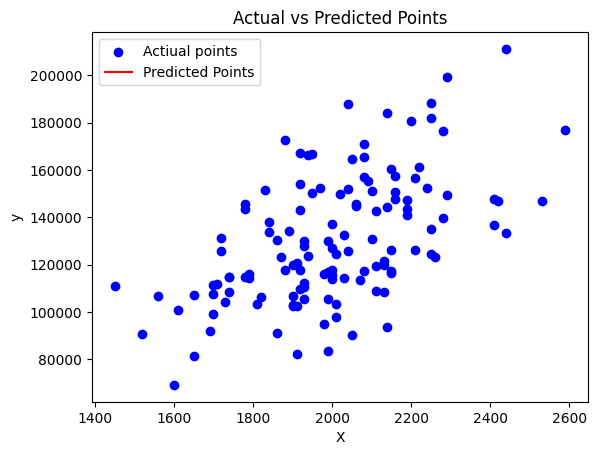

In [27]:
plt.scatter(data['SqFt'], y, color='blue', label='Actiual points')
plt.plot(data['SqFt'], predictions, color='red', label='Predicted Points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Actual vs Predicted Points")
plt.legend()
plt.show()

In [28]:
np.dot([[1,2,3,4],[3,4,5,6]],[1,1,1,1])

array([10, 18])